# Exploratory Data Analysis (EDA)
This notebook provides a visual overview of the features extracted from both datasets (for-norm and In the wild).

## What This Notebook Covers:
- Basic data overview
- Class distribution for each dataset
- Feature distribution using KDE plots

In [2]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Paths to extracted CSVs
for_norm_path = "Processed_Features/for_norm_features.csv"
release_in_wild_path = "Processed_Features/release_in_wild_features.csv"

# Load datasets
df_norm = pd.read_csv(for_norm_path)
df_wild = pd.read_csv(release_in_wild_path)

# Quick look
print("For-norm dataset:", df_norm.shape)
print("release-In-the-wild dataset:", df_wild.shape)

For-norm dataset: (69298, 30)
release-In-the-wild dataset: (31779, 29)


## Class Distribution Plots (Fake vs Real)

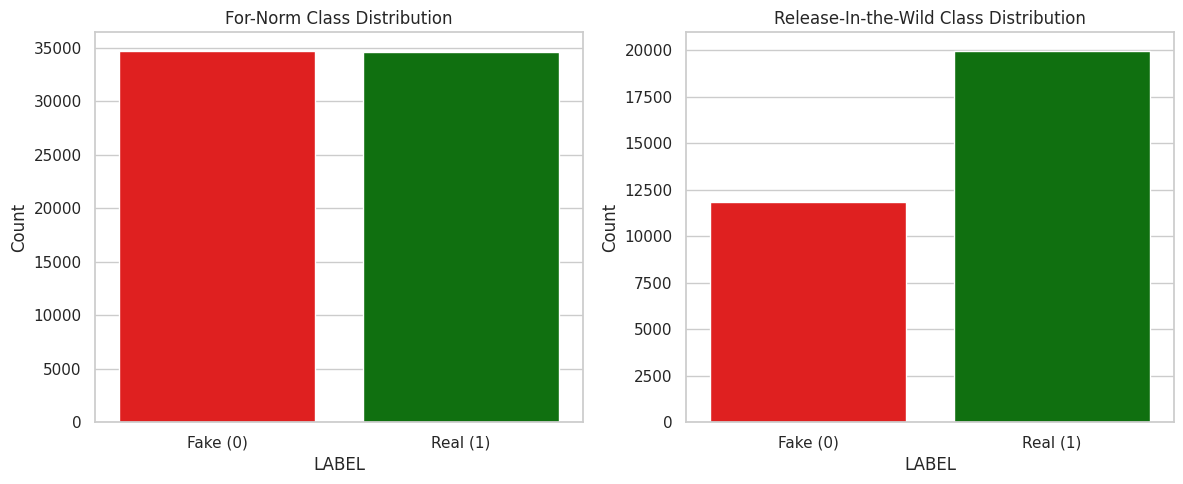

In [8]:
# Set style
sns.set(style="whitegrid")

# Class counts for both datasets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# For-norm
sns.countplot(data=df_norm, x="LABEL", hue="LABEL", palette=["red", "green"], ax=axes[0], legend=False)
axes[0].set_title("For-Norm Class Distribution")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Fake (0)", "Real (1)"])
axes[0].set_ylabel("Count")



# Release-In-the-wild
sns.countplot(data=df_wild, x="LABEL", hue="LABEL", palette=["red", "green"], ax=axes[1], legend=False)
axes[1].set_title("Release-In-the-Wild Class Distribution")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Fake (0)", "Real (1)"])
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

## Feature Distributions

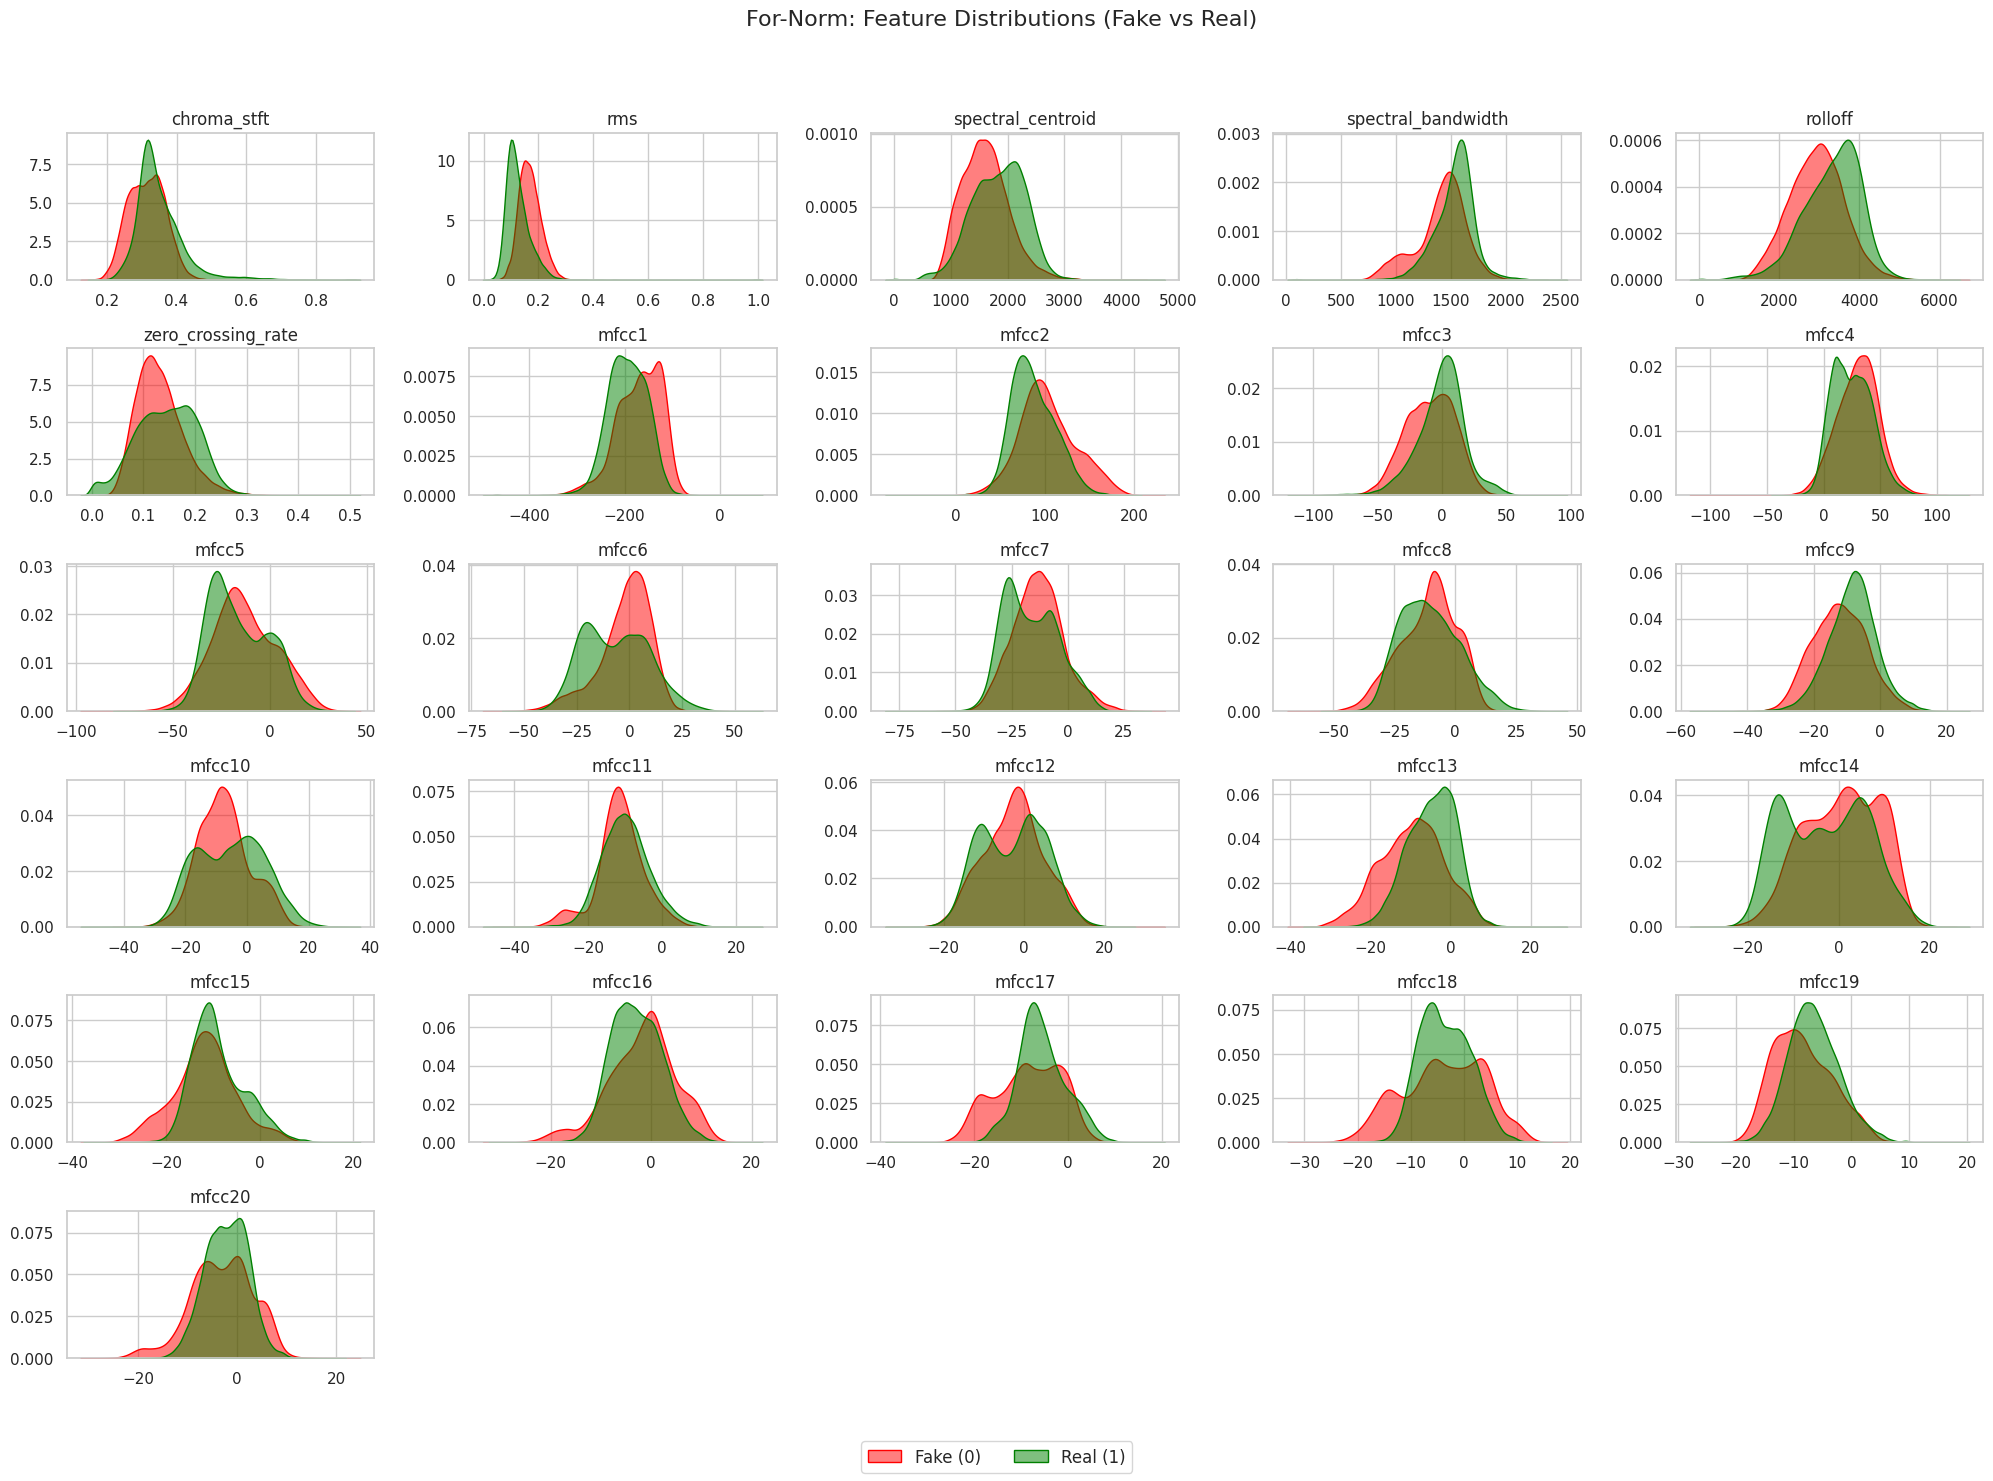

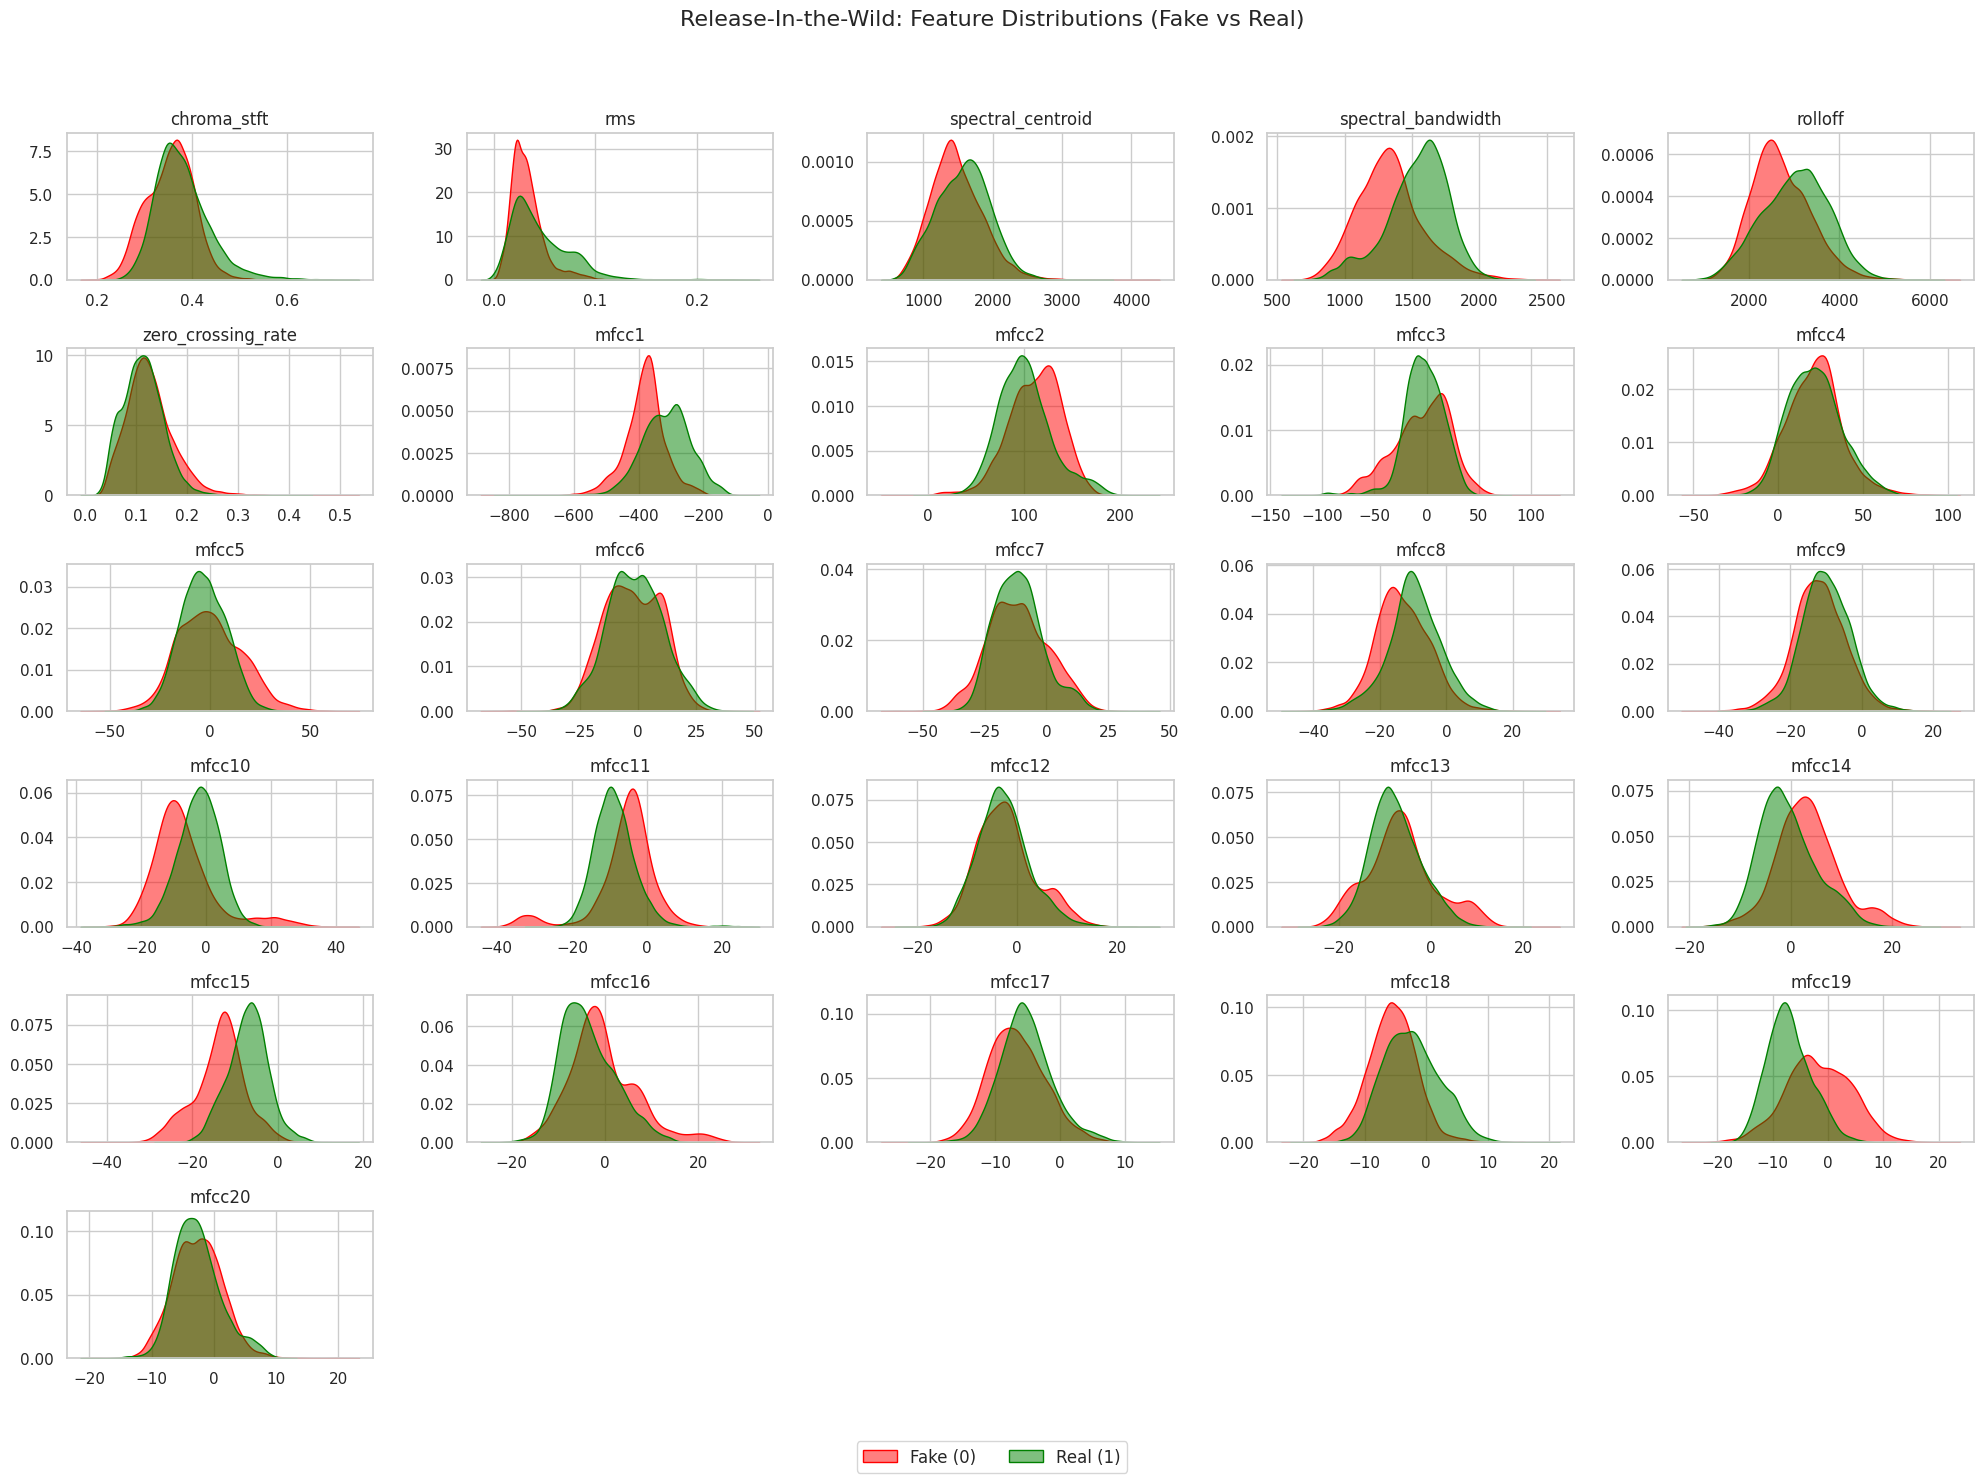

In [9]:
# Feature groups
base_features = ["chroma_stft", "rms", "spectral_centroid", "spectral_bandwidth", 
                 "rolloff", "zero_crossing_rate"]
mfcc_features = [f"mfcc{i}" for i in range(1, 21)]
all_features = base_features + mfcc_features

# Plot settings
n_cols = 5
n_rows = int(np.ceil(len(all_features) / n_cols))

# For-Norm Dataset
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()
for i, feature in enumerate(all_features):
    sns.kdeplot(data=df_norm[df_norm["LABEL"] == 0], x=feature, label="Fake (0)", fill=True, color="red", alpha=0.5, ax=axes[i])
    sns.kdeplot(data=df_norm[df_norm["LABEL"] == 1], x=feature, label="Real (1)", fill=True, color="green", alpha=0.5, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].legend().remove()
# Remove unused axes
for j in range(len(all_features), len(axes)):
    fig.delaxes(axes[j])
fig.suptitle("For-Norm: Feature Distributions (Fake vs Real)", fontsize=16)
fig.legend(["Fake (0)", "Real (1)"], loc="lower center", ncol=2, fontsize=12)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

# Release_In-the-Wild Dataset
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()
for i, feature in enumerate(all_features):
    sns.kdeplot(data=df_wild[df_wild["LABEL"] == 0], x=feature, label="Fake (0)", fill=True, color="red", alpha=0.5, ax=axes[i])
    sns.kdeplot(data=df_wild[df_wild["LABEL"] == 1], x=feature, label="Real (1)", fill=True, color="green", alpha=0.5, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].legend().remove()
# Remove unused axes
for j in range(len(all_features), len(axes)):
    fig.delaxes(axes[j])
fig.suptitle("Release-In-the-Wild: Feature Distributions (Fake vs Real)", fontsize=16)
fig.legend(["Fake (0)", "Real (1)"], loc="lower center", ncol=2, fontsize=12)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()